In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Load data
imdb_movies = pd.read_csv('Data/tmdb_5000_movies.csv')
imdb_credits = pd.read_csv('Data/tmdb_5000_credits.csv')

In [3]:
def get_list(x):
    list_dict = ast.literal_eval(x)
    if(list_dict):
        list_ = []
        for d in list_dict:
            list_.append(d['name'].replace(' ',''))
        return list_
    else: 
        return ['None']

def join_list(x):
    return ' '.join(x)

In [4]:
def get_similarity(column, dataset):
    '''Function for computing the adjacency matrices
    INPUTS: column: name of the column we want the adjacency matrix for
            dataset: imdb dataset containing the needed column (imdb_movies or imdb_credits)
    RETURN: csim: sclaed cosine similarity distance adjacency matrix'''
    
    # Make a temporary copy for computation
    data_copy = dataset.copy()
    
    # Modify column so we can compute similarity
    data_copy[column] = data_copy[column].apply(get_list)
    items = sorted(data_copy.explode(column=column)[column].unique())
    data_copy[column] = data_copy[column].apply(join_list)
    
    # Vectorize and compute similarity
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(data_copy[column]).toarray()
    csim = cosine_similarity(vectors)
    
    # Min-max scaling
    csim[np.diag_indices(csim.shape[0])] = 0
    csim = csim/csim.ptp()
    
    # transformation to DataFrame
    csim = pd.DataFrame(csim, index=data_copy['title'], columns=data_copy['title'])
    
    return csim

In [5]:
# Agjacency matrices generation
csim_genre = get_similarity('genres', imdb_movies) # Movie genre (e.g Action, Drama...)
csim_keywords = get_similarity('keywords', imdb_movies) # Movie kewords
csim_cast = get_similarity('cast', imdb_credits) # Movie cast (actors)
csim_crew = get_similarity('crew', imdb_credits) # Movie cast (realisator, productor...)

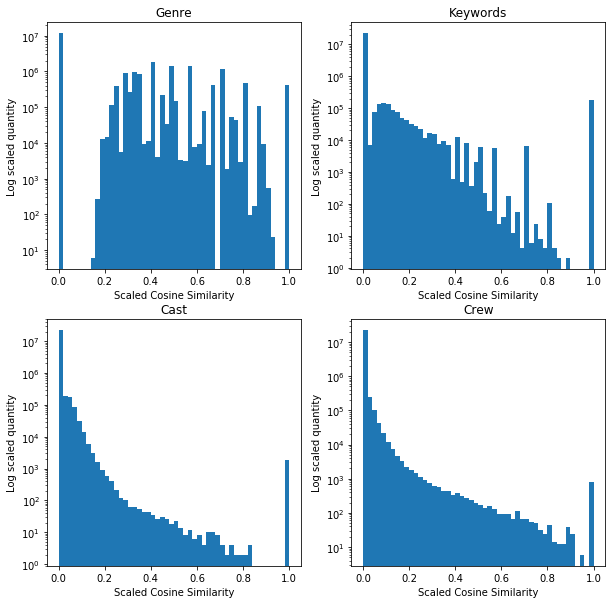

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(10, 10))
axs[0, 0].hist(csim_genre.values.ravel(), log=True, bins=50)
axs[0, 0].set_title('Genre')
axs[0, 0].set_xlabel('Scaled Cosine Similarity')
axs[0, 0].set_ylabel('Log scaled quantity')
axs[0, 1].hist(csim_keywords.values.ravel(), log=True, bins=50)
axs[0, 1].set_title('Keywords')
axs[0, 1].set_xlabel('Scaled Cosine Similarity')
axs[0, 1].set_ylabel('Log scaled quantity')
axs[1, 0].hist(csim_cast.values.ravel(), log=True, bins=50)
axs[1, 0].set_title('Cast')
axs[1, 0].set_xlabel('Scaled Cosine Similarity')
axs[1, 0].set_ylabel('Log scaled quantity')
axs[1, 1].hist(csim_crew.values.ravel(), log=True, bins=50)
axs[1, 1].set_title('Crew')
axs[1, 1].set_xlabel('Scaled Cosine Similarity')
axs[1, 1].set_ylabel('Log scaled quantity')
plt.show()

In [7]:
csim_genre.to_pickle('Data/csim_genre')
csim_keywords.to_pickle('Data/csim_keywords')
csim_cast.to_pickle('Data/csim_cast')
csim_crew.to_pickle('Data/csim_crew')